In [1]:
# import necessary libraries after execution state reset
import pandas as pd

# define constants
annual_salary = 110000
annual_401k_contribution = 16000  # planned 401(k) contribution
annual_living_expenses = 54000  # planned Living expenses (4500*12)
annual_roth_ira_contribution = 7000  # planned Roth IRA contribution
FICA = 0 # (still on F1 2023-2027 I don't need to pay FICA)

# Federal income tax brackets for 2025 (single filer)
federal_tax_brackets = [
    (11925, 0.10),  # 10% on income up to $11,925
    (48475 - 11925, 0.12),  # 12% on income from $11,926 to $48,475
    (103350 - 48475, 0.22),  # 22% on income from $48,476 to $103,350
    (197300 - 103350, 0.24),  # 24% on income from $103,351 to $197,300
    (250525 - 197300, 0.32),  # 32% on income from $197,301 to $250,525
    (626351 - 250525, 0.35),  # 35% on income from $250,526 to $626,350
    (float('inf'), 0.37)  # 37% on income above $626,351
]

# Standard deduction for a single filer
standard_deduction = 15000

# FICA taxes (if needed)
fica_social_security_rate = 0.062 # 6.2% on income up to $176,100
fica_medicare_rate = 0.0145 # 1.45% on all wages
fica_medicare_rate = 0.009 # 0.9% (0.9% on wages over $200,000 for single filers.)

state_tax_percent = 0

In [2]:
# Calculate taxable income after 401(k) contributions and standard deduction
taxable_income = annual_salary - annual_401k_contribution - standard_deduction

# Calculate estimated federal tax
federal_income_tax = 0
remaining_income = taxable_income

for bracket, rate in federal_tax_brackets:
    if remaining_income <= 0:
        break
    income_in_bracket = min(remaining_income, bracket)
    tax_amount = income_in_bracket * rate
    federal_income_tax += tax_amount
    remaining_income -= income_in_bracket

federal_income_tax

12294.0

In [3]:
# Calculate FICA taxes 
# Calculated based on your gross salary before 401(k) contributions
fica_social_security_tax = min(annual_salary, 176100) * fica_social_security_rate  # Cap at $176,100
fica_medicare_tax = annual_salary * fica_medicare_rate
fica_add_medicare_tax = (annual_salary - 200000) * fica_medicare_rate
fica_tax = fica_social_security_tax + fica_medicare_tax + fica_add_medicare_tax

fica_tax

7000.0

In [4]:
state_tax = taxable_income * state_tax_percent

state_tax

0

In [5]:
if FICA == 1:
    annual_total_taxes = federal_income_tax + fica_tax + state_tax
else:
    annual_total_taxes = federal_income_tax + state_tax

annual_total_taxes

12294.0

In [6]:
biweekly_gross_pay = annual_salary / 26  # Bi-weekly salary
biweekly_401k_contribution = annual_401k_contribution / 26  # Bi-weekly 401(k) deduction
biweekly_total_taxes = annual_total_taxes / 26 # # Bi-weekly total tax

# Calculate bi-weekly net pay
biweekly_net_pay = biweekly_gross_pay - biweekly_401k_contribution - biweekly_total_taxes 


In [7]:
# Adjusting pay schedule for new start date of February 10, 2025
new_pay_dates = [
    "Feb 14", "Feb 28", "Mar 14", "Mar 28", "Apr 11", "Apr 25", "May 9", "May 23",
    "Jun 6", "Jun 20", "Jul 4", "Jul 18", "Aug 1", "Aug 15", "Aug 29", "Sep 12",
    "Sep 26", "Oct 10", "Oct 24", "Nov 7", "Nov 21", "Dec 5", "Dec 19"
]

# Adjust first paycheck for a partial period (Feb 10 start date, working ~4 out of 10 days in that pay period)
first_pay_gross = (4 / 10) * biweekly_gross_pay
first_pay_401k = (4 / 10) * biweekly_401k_contribution
first_pay_federal_tax = (4 / 10) * biweekly_total_taxes
first_pay_net = first_pay_gross - first_pay_401k - first_pay_federal_tax 

# Create adjusted pay schedule DataFrame
adjusted_pay_schedule = pd.DataFrame({
    "Pay Date": new_pay_dates,
    "Gross Pay ($)": [first_pay_gross] + [biweekly_gross_pay] * (len(new_pay_dates) - 1),
    "401(k) Contribution ($)": [-first_pay_401k] + [-biweekly_401k_contribution] * (len(new_pay_dates) - 1),
    "Federal Tax ($)": [-first_pay_federal_tax] + [-biweekly_total_taxes] * (len(new_pay_dates) - 1),
    "Net Pay ($)": [first_pay_net] + [biweekly_net_pay] * (len(new_pay_dates) - 1)
})

adjusted_pay_schedule

,Pay Date,Gross Pay ($),401(k) Contribution ($),Federal Tax ($),Net Pay ($)
0,Feb 14,1692.307692,-246.153846,-189.138462,1257.015385
1,Feb 28,4230.769231,-615.384615,-472.846154,3142.538462
2,Mar 14,4230.769231,-615.384615,-472.846154,3142.538462
3,Mar 28,4230.769231,-615.384615,-472.846154,3142.538462
4,Apr 11,4230.769231,-615.384615,-472.846154,3142.538462
5,Apr 25,4230.769231,-615.384615,-472.846154,3142.538462
6,May 9,4230.769231,-615.384615,-472.846154,3142.538462
7,May 23,4230.769231,-615.384615,-472.846154,3142.538462
8,Jun 6,4230.769231,-615.384615,-472.846154,3142.538462
9,Jun 20,4230.769231,-615.384615,-472.846154,3142.538462


In [8]:
annual_remaining_income = annual_salary - annual_401k_contribution - annual_roth_ira_contribution - annual_total_taxes -annual_living_expenses

biweekly_gross_income = annual_salary / 26
biweekly_401k_contribution = annual_401k_contribution / 26
biweekly_roth_ira_contribution = annual_roth_ira_contribution / 26
biweekly_total_taxes = annual_total_taxes / 26
biweekly_living_expenses = annual_living_expenses / 26
biweekly_remaining_income = annual_remaining_income / 26

monthly_gross_income = annual_salary / 12
monthly_401k_contribution = annual_401k_contribution / 12
monthly_roth_ira_contribution = annual_roth_ira_contribution / 12
monthly_total_taxes = annual_total_taxes / 12
monthly_living_expenses = annual_living_expenses / 12
monthly_remaining_income =  annual_remaining_income / 12

In [9]:
breakdown_df = pd.DataFrame({
    "Category": [
        "Gross Income",
        "401(k) Contribution",
        "Roth IRA Contribution",
        "Taxes",
        "Living Expenses",
        "Remaining Income"
    ],
    "Annual ($)": [
        annual_salary,
        annual_401k_contribution,
        annual_roth_ira_contribution,
        annual_total_taxes,
        annual_living_expenses,
        annual_remaining_income
    ],
    "Monthly ($)": [
        monthly_gross_income,
        monthly_401k_contribution,
        monthly_roth_ira_contribution,
        monthly_total_taxes,
        monthly_living_expenses,
        monthly_remaining_income
    ],
    "Bi-Weekly ($)": [
        biweekly_gross_income,
        biweekly_401k_contribution,
        biweekly_roth_ira_contribution,
        biweekly_total_taxes,
        biweekly_living_expenses,
        biweekly_remaining_income
    ]
})

In [10]:
breakdown_df

,Category,Annual ($),Monthly ($),Bi-Weekly ($)
0,Gross Income,110000.0,9166.666667,4230.769231
1,401(k) Contribution,16000.0,1333.333333,615.384615
2,Roth IRA Contribution,7000.0,583.333333,269.230769
3,Taxes,12294.0,1024.500000,472.846154
4,Living Expenses,54000.0,4500.000000,2076.923077
5,Remaining Income,20706.0,1725.500000,796.384615


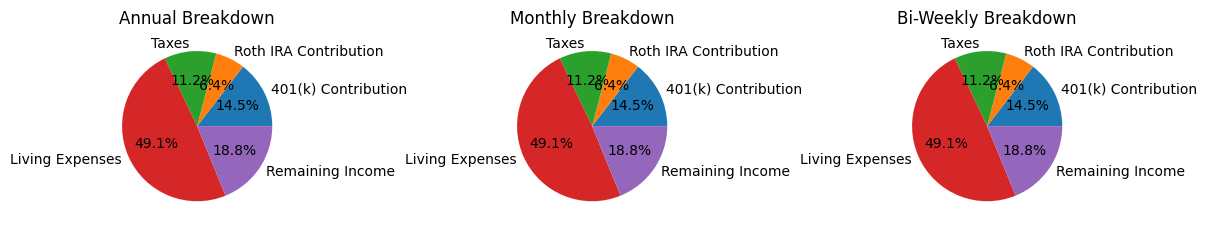

In [11]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# Filter data for pie charts
expenses_df = breakdown_df[breakdown_df['Category'] != 'Gross Income']

# Annual pie chart
ax1.pie(expenses_df['Annual ($)'].abs(), labels=expenses_df['Category'], autopct='%1.1f%%')
ax1.set_title('Annual Breakdown')

# Monthly pie chart
ax2.pie(expenses_df['Monthly ($)'].abs(), labels=expenses_df['Category'], autopct='%1.1f%%')
ax2.set_title('Monthly Breakdown')

# Bi-Weekly pie chart
ax3.pie(expenses_df['Bi-Weekly ($)'].abs(), labels=expenses_df['Category'], autopct='%1.1f%%')
ax3.set_title('Bi-Weekly Breakdown')

plt.tight_layout()
plt.show()